<a href="https://colab.research.google.com/github/leeyerin25/TIL_python/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

y_train=tf.keras.utils.to_categorical(y_train,10) #원핫인코딩화시켜줌
y_test=tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 2s 0us/step


#Q.이미지를 255로 나누는 이유는??
 0은 흰색 255는 검은색
```
 255가 최대값이라 255 로 나누는 최대최소정규화를 진행함.
-> 어떤 형태 데이터라도 정규화가 안되면 최적을 찾아가기가 어려워짐. 그치만 정규화가 되면 훨씬 최적의 값을 잘 찾아감 (0~1사이 분포가되니까)
 ```

In [4]:
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))  # 32*32 3 에서 3은 rgb 3장을 의미
cnn.add(Conv2D(32,(3,3),activation='relu'))     # 32, (3,3)  -> 3*3 짜리 커널을 32개 쓴다는 의미
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten()) # 2차원이 1차원으로 변함
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [5]:
# 신경망 모델 학습
#cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
#hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

In [6]:
# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn=tf.keras.models.load_model("/content/drive/MyDrive/기계학습/my_cnn.h5")
cnn.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        36928     
                                                     

```
(None, 30, 30, 32)  -> 한층 컨볼루션 통과하니 나온 쉐잎. 가장자리가 다 줄음

param 896 -> 기계가 다 맞춰야 하는 숫자
896 ?
```

In [7]:
# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 79.68000173568726


In [8]:
for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

conv2d_11 (3, 3, 3, 32)
conv2d_12 (3, 3, 32, 32)
conv2d_13 (3, 3, 32, 64)
conv2d_14 (3, 3, 64, 64)


##커널의 모습을 봐보자

In [9]:
kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

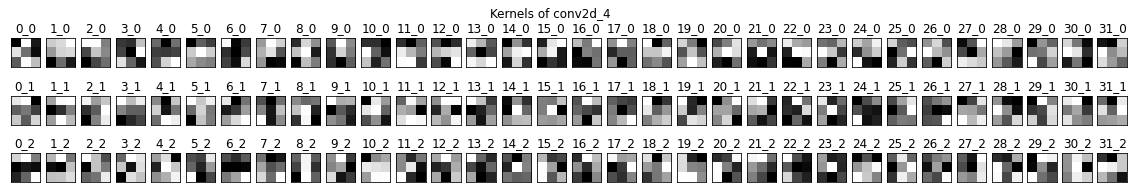

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()

In [11]:
for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

conv2d_11 (None, 30, 30, 32)
conv2d_12 (None, 28, 28, 32)
conv2d_13 (None, 12, 12, 64)
conv2d_14 (None, 10, 10, 64)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


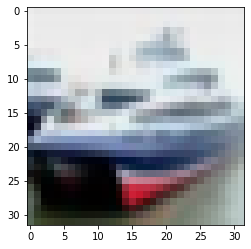

In [12]:
from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

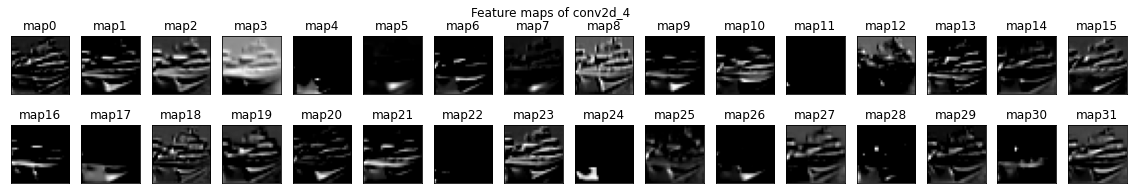

In [13]:
plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()